# Geopandas - Operazioni base

In [ ]:
!pip install geopandas

In [3]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, MultiPoint, MultiLineString, Point, MultiPolygon, shape

Il metodo `geopandas.read_file()`, crea un `GeoDataFrame` partendo da un file.

In [4]:
distrects = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/districtsOfMilan.zip')
distrects = distrects.set_geometry('geometry')    # Si imposta la colonna delle geometrie in modo tale che in seguito si possa richimare direttamente tutto il DataFrame invece che la colonna

distrects

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


Come mostrato nell'introduzione il *GeoDataFrame* è un unione di un *DataFrame* con colonne di tipo `geometry` che riportano informazioni sulle geometrie di una forma, una line o un punto

In [5]:
distrects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_NIL      88 non-null     int64   
 1   NIL         88 non-null     object  
 2   Valido_dal  88 non-null     object  
 3   Valido_al   88 non-null     object  
 4   Fonte       88 non-null     object  
 5   Shape_Leng  88 non-null     float64 
 6   Shape_Area  88 non-null     float64 
 7   OBJECTID    88 non-null     int64   
 8   geometry    88 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 6.3+ KB


Con la priprietà `.area` è possibile calcolare l'area dei poligoni (L'area viene espressa in ettari)

In [6]:
distrects.area 

0     0.000277
1     0.000056
2     0.000105
3     0.000182
4     0.000177
        ...   
83    0.000149
84    0.000189
85    0.000138
86    0.000280
87    0.000304
Length: 88, dtype: float64

Dopo aver importato i dati sulle geometrie è possibile creare un grafico con il metodo `.plot()`

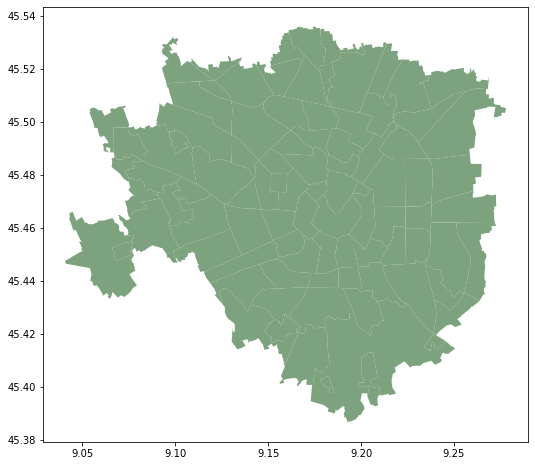

In [7]:
distrects.plot(figsize=(20,8), color='#7da27e')

Per ottenere il confine di ogni poligono (LineString), bisogna utilizzare la proprietà `geopandas.GeoDataFrame.boundary`.
In seguito con il metodo `geopandas.GeoDataFrame.boundary.plot()` è possibile creare una mappa con solo i confini dei poligoni.

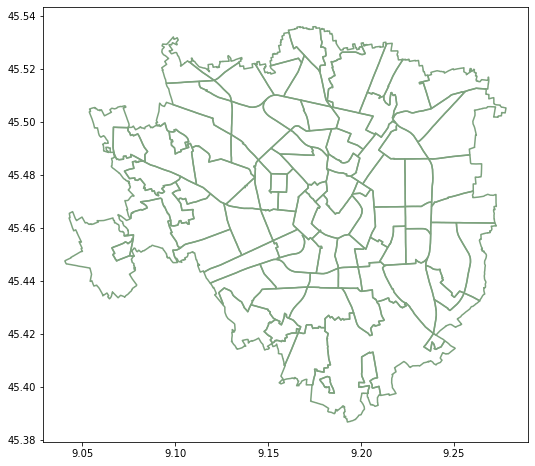

In [8]:
distrects.boundary.plot(figsize=(20,8), color='#7da27e')

Con la proprietà `geopandas.GeoSeries.centroid` è possibile raccogliere informazioni sui centri delle geometrie.

🔗 [Docs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html)

In [9]:
distrects['centers'] = distrects.centroid
distrects['centers']

0     POINT (9.13726 45.43846)
1     POINT (9.10167 45.49282)
2     POINT (9.15395 45.48449)
3     POINT (9.15673 45.51743)
4     POINT (9.18424 45.52351)
                ...           
83    POINT (9.16286 45.47354)
84    POINT (9.18816 45.47425)
85    POINT (9.24352 45.43667)
86    POINT (9.24836 45.51409)
87    POINT (9.11932 45.45135)
Name: centers, Length: 88, dtype: geometry

Dopo aver trovato i centri per ogni geometria è possibile raffigurarli sulla mappa originale

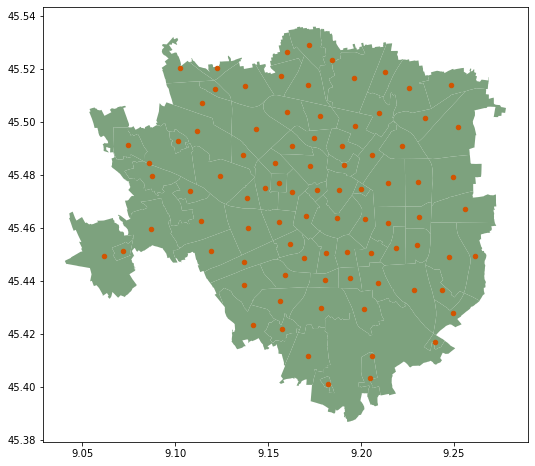

In [10]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')                # Si imposta come base la mappa originale
distrects['centers'].plot(ax=ax, color='#d35400', markersize=20)    # Crea la cartiana basandosi sulla mappa originale

E' possibile estrarre una o più aree eseguendo operazioni di ricerca all'interno del GeoDataFrame

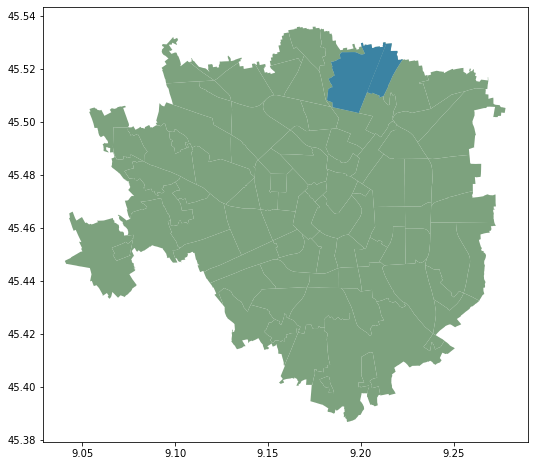

In [11]:
data = distrects[(distrects['NIL'] == 'NIGUARDA - CA\' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI') | (distrects['NIL'] == 'BICOCCA')]

ax = distrects.plot(figsize=(20,8), color='#7da27e')
data.plot(ax=ax, alpha=0.7)    # Imposta un'opacita del 70% sulle figure che inserirà nella cartina

### ‍Creare linee, punti e poligoni utilizzando le coordinate

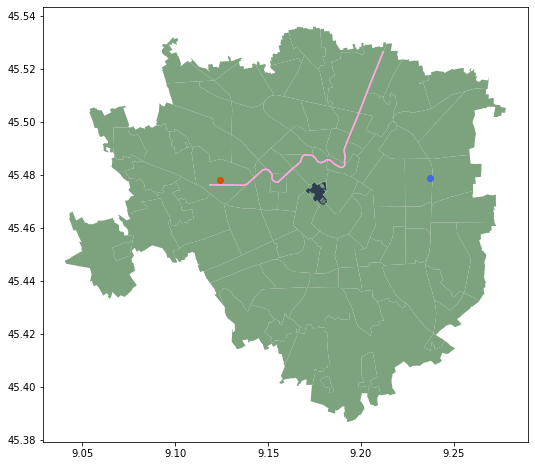

In [43]:
# Punto originale preso da Google Maps, quando si copia una coordinata da esso bisogna invertire la longitudine con la laritudine e viceversa
# (45.47812572989568, 9.123965813080455)

# Si crea una GeoSeries contente un unico punto
san_siro_stadio = gpd.GeoSeries([Point((9.123965813080455, 45.47812572989568))], crs='epsg:4326')
zero_gravity = gpd.GeoSeries([Point((9.23688430903837, 45.47873209749087))], crs='epsg:4326')

subways = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/milanMetropolitanSystem_Lines.geojson')
m5 = subways.loc[subways['linea'] == "5", 'geometry']

milanParks = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/milanParks.geojson')
parco_sempione = milanParks.loc[milanParks['CODICE_AREA'] == "151", 'geometry']


# Plot
ax = distrects.plot(figsize=(20,8), color='#7da27e')
san_siro_stadio.plot(ax=ax, color='#d35400')
m5.plot(ax=ax, color='#FDA7DF')
parco_sempione.plot(ax=ax, color='#2c3e50')
zero_gravity.plot(ax=ax, color='royalblue')